In [1]:
import numpy as np
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns

In [2]:
df = pd.read_csv('../../../TURB/Final/FINAL_DATA.csv', sep=',', index_col=0)
df

,CU_455,CU_412,Date,Stn,Depth,Cat
Samples,,,,,,
230901,31.53930137,38.38634228,4/22/2023,SEL-SF,S,2309
230902,32.96850573,40.45106621,4/22/2023,SEL-SF,B,2309
230903,24.51857071,29.93318464,4/22/2023,SEL-ME,S,2309
230904,27.91731576,34.30168715,4/22/2023,SEL-ME,B,2309
230905,BDL,5.395552153,4/22/2023,SEL-IN,S,2309
...,...,...,...,...,...,...
231717,33.63257577,19.28422407,5/10/2023,EAC-T6,S,Rerun 2317
231718,35.50877775,19.37897159,5/10/2023,EAC-T6,B,Rerun 2317
231719,35.35565125,19.24271777,5/10/2023,EAC-T7,S,Rerun 2317


In [3]:
df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = df['CU_455'].replace('BDL', 0)
df['sample'] = df.index
df

,CU_455,CU_412,Date,Stn,Depth,Cat,sample
Samples,,,,,,,
230901,31.53930137,38.38634228,4/22/2023,SEL-SF,S,2309,230901
230902,32.96850573,40.45106621,4/22/2023,SEL-SF,B,2309,230902
230903,24.51857071,29.93318464,4/22/2023,SEL-ME,S,2309,230903
230904,27.91731576,34.30168715,4/22/2023,SEL-ME,B,2309,230904
230905,0,5.395552153,4/22/2023,SEL-IN,S,2309,230905
...,...,...,...,...,...,...,...
231717,33.63257577,19.28422407,5/10/2023,EAC-T6,S,Rerun 2317,231717
231718,35.50877775,19.37897159,5/10/2023,EAC-T6,B,Rerun 2317,231718
231719,35.35565125,19.24271777,5/10/2023,EAC-T7,S,Rerun 2317,231719


In [4]:
import pandas as pd

# Assuming you have already loaded the DataFrame and it's named 'df'

# Print column names
print("Column Names:")
print(df.columns)

# Print column types
print("\nColumn Types:")
print(df.dtypes)


Column Names:
Index(['CU_455', 'CU_412', 'Date', 'Stn ', 'Depth', 'Cat', 'sample'], dtype='object')

Column Types:
CU_455    object
CU_412    object
Date      object
Stn       object
Depth     object
Cat       object
sample     int64
dtype: object


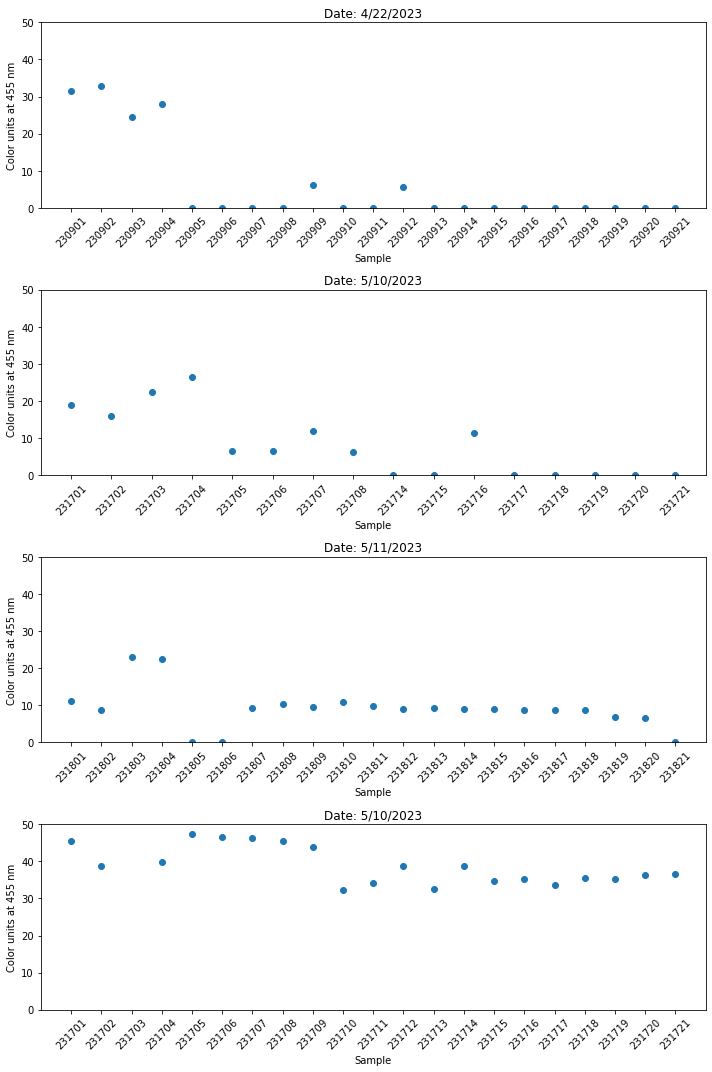

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Convert 'sample' column to string type
df['sample'] = df['sample'].astype(str)

# Create subplots
fig, axes = plt.subplots(nrows=4, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (Cat, ax) in enumerate(zip(df['Cat'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Cat'] == Cat]
    
    # Scatter plot CU_455 by sample
    ax.scatter(data['sample'], data['CU_455'])
    date = data["Date"].iloc[0]
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 50)
    
    # Rotate x-axis labels by 45 degrees
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


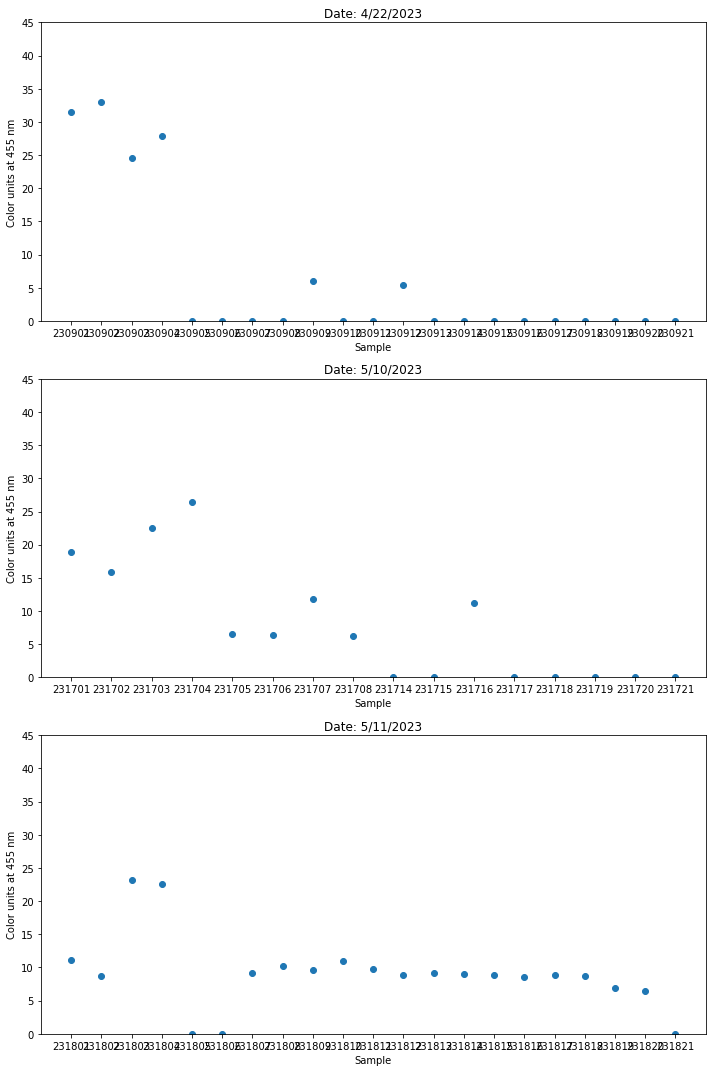

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Convert 'sample' column to string type
df['sample'] = df['sample'].astype(str)

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by sample
    ax.scatter(data['sample'], data['CU_455'])
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


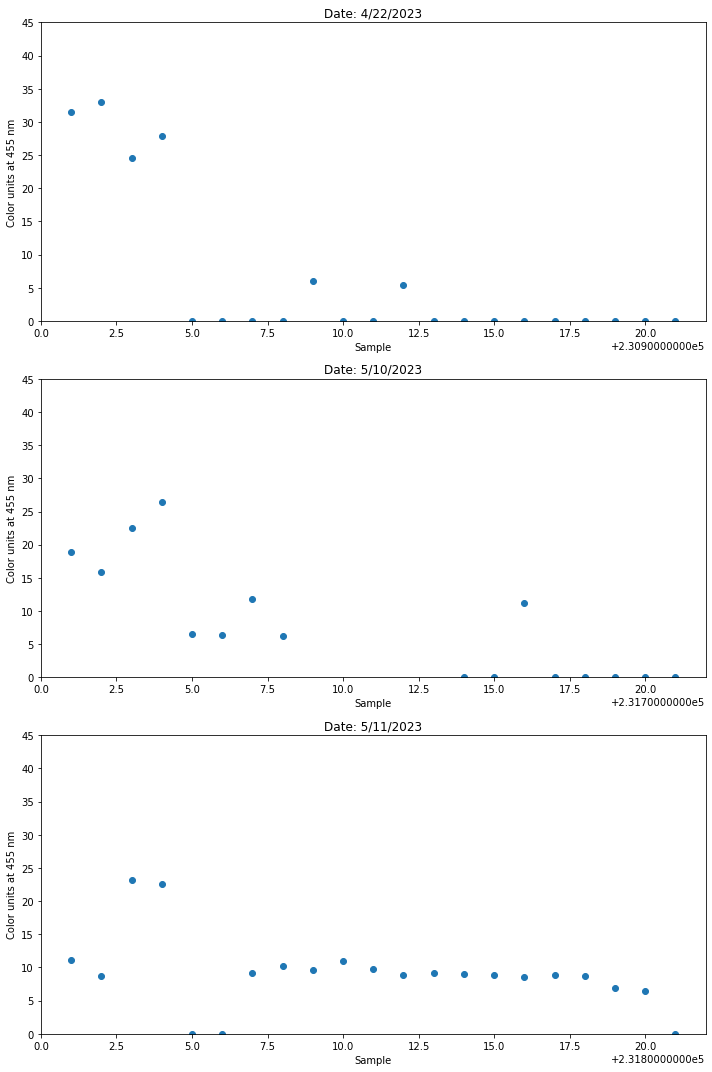

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by sample
    ax.scatter(data['sample'], data['CU_455'])
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


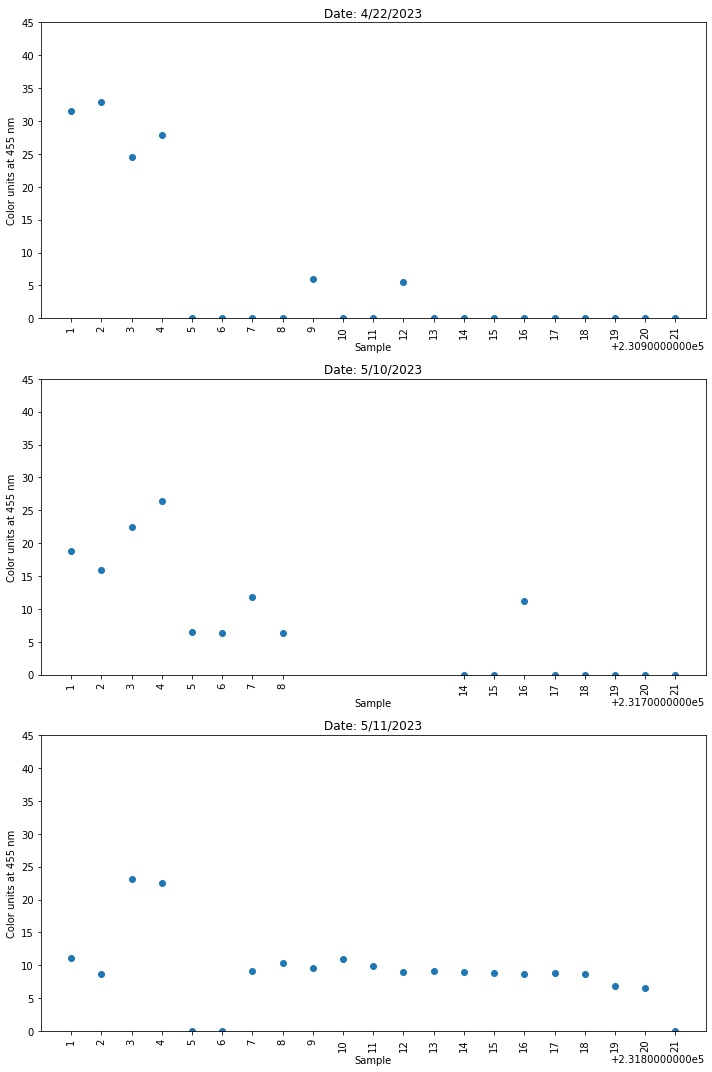

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by sample
    ax.scatter(data.index, data['CU_455'])
    
    # Set x-axis ticks and labels
    ax.set_xticks(data.index)
    ax.tick_params(axis='x', rotation=90)
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


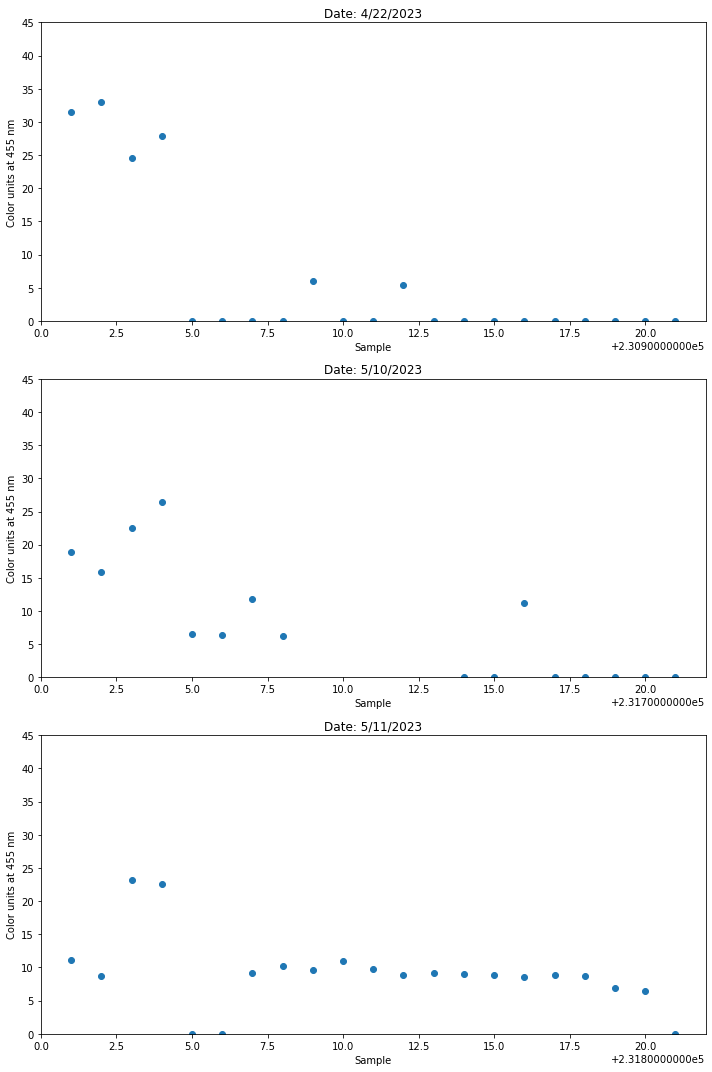

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Reset the index and rename the column
df.reset_index(inplace=True)
df.rename(columns={'index': 'sample'}, inplace=True)

# Convert 'sample' column to categorical
df['sample'] = pd.Categorical(df['sample'])

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by sample
    ax.scatter(data['sample'], data['CU_455'])
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


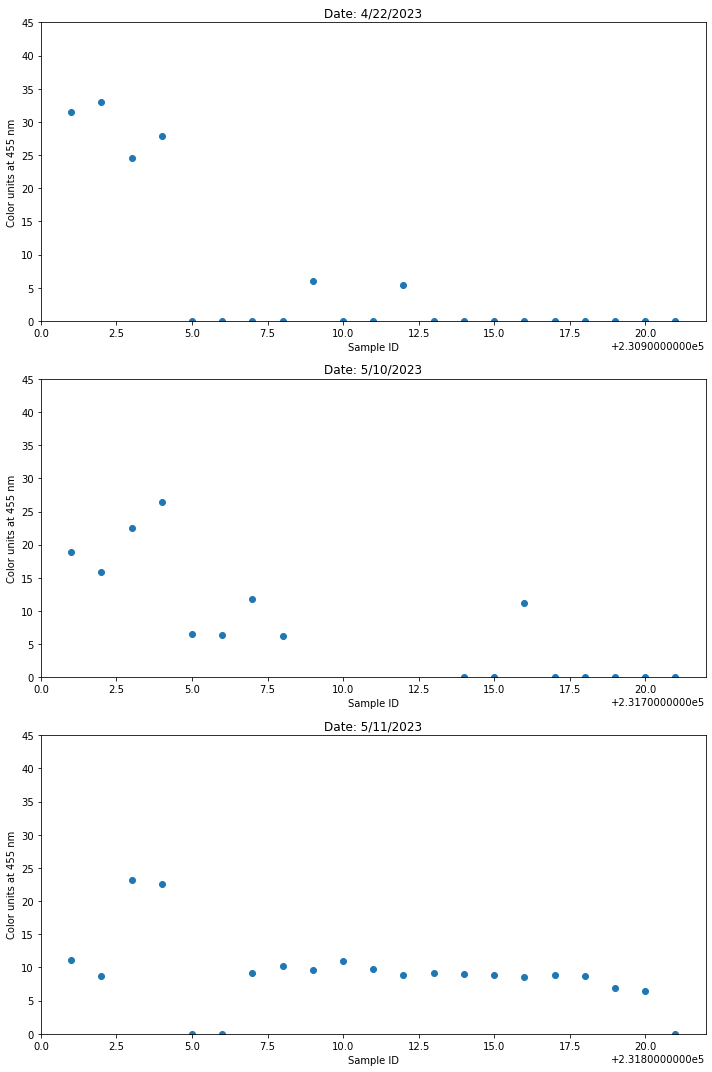

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by sample
    ax.scatter(data["sample"], data['CU_455'])
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample ID')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


In [57]:
df

,Samples,CU_455,CU_412,Date,Stn,Depth,sample
0,230901,31.539301,38.38634228,4/22/2023,SEL-SF,S,230901
1,230902,32.968506,40.45106621,4/22/2023,SEL-SF,B,230902
2,230903,24.518571,29.93318464,4/22/2023,SEL-ME,S,230903
3,230904,27.917316,34.30168715,4/22/2023,SEL-ME,B,230904
4,230905,0.000000,5.395552153,4/22/2023,SEL-IN,S,230905
5,230906,0.000000,0,4/22/2023,SEL-IN,B,230906
6,230907,0.000000,0,4/22/2023,EAC-T1,S,230907
7,230908,0.000000,0,4/22/2023,EAC-T1,B,230908
8,230909,6.033246,0,4/22/2023,EAC-T2,S,230909
9,230910,0.000000,0,4/22/2023,EAC-T2,B,230910


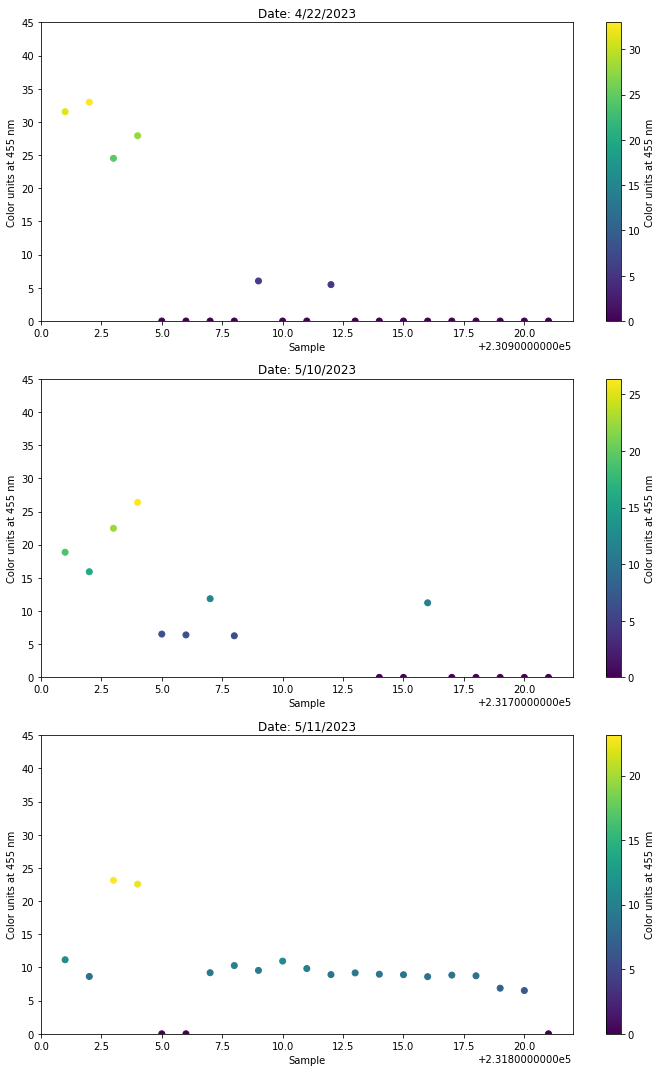

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Reset the index and rename the column

# Create a color map using viridis
cmap = plt.cm.viridis

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by sample, color by CU_455 values
    sc = ax.scatter(data['sample'], data['CU_455'], c=data['CU_455'], cmap=cmap)
    
    # Set colorbar
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label('Color units at 455 nm')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Sample')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


In [54]:
data

,CU_455,CU_412,Date,Stn,Depth,sample
Samples,,,,,,
231801,11.156799,13.97865528,5/11/2023,SEL-SF,S,231801
231802,8.639006,9.427391438,5/11/2023,SEL-SF,B,231802
231803,23.128358,29.34109339,5/11/2023,SEL-ME,S,231803
231804,22.553362,26.00881311,5/11/2023,SEL-ME,B,231804
231805,0.000000,0,5/11/2023,SEL-IN,S,231805
231806,0.000000,0,5/11/2023,SEL-IN,B,231806
231807,9.206362,7.838833951,5/11/2023,EAC-T1,S,231807
231808,10.284289,8.010106966,5/11/2023,EAC-T1,B,231808
231809,9.553522,8.093008075,5/11/2023,EAC-T2,S,231809


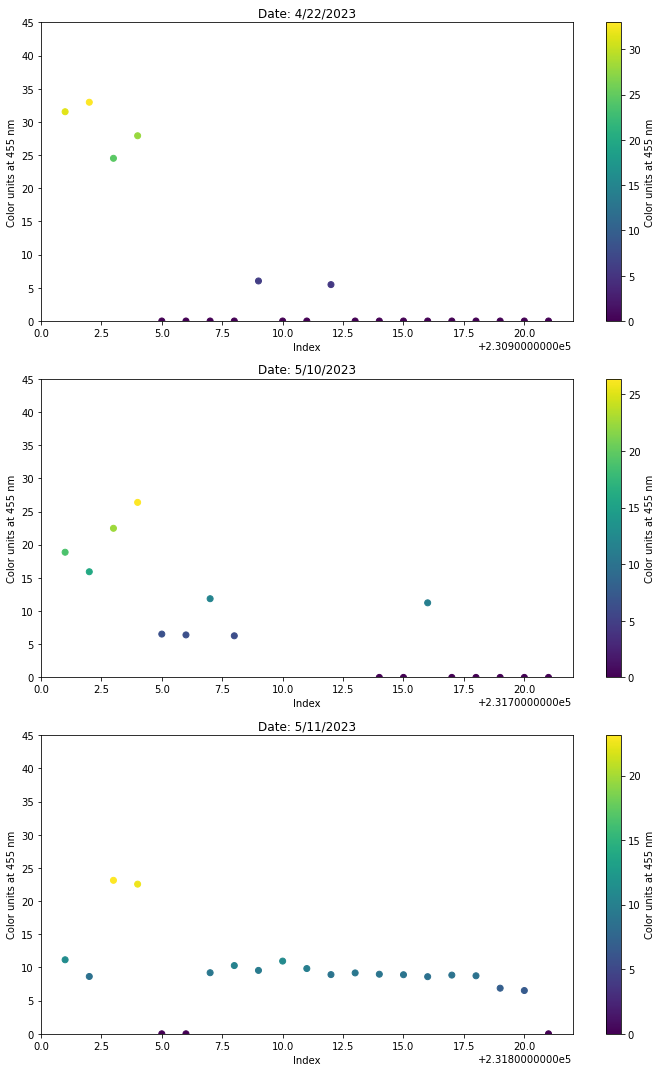

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Create a color map using viridis
cmap = plt.cm.viridis

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(df['Date'].unique(), axes)):
    # Get data for the current date category
    data = df[df['Date'] == date]
    
    # Scatter plot CU_455 by index, color by CU_455 values
    sc = ax.scatter(data.index, data['CU_455'], c=data['CU_455'], cmap=cmap)
    
    # Set colorbar
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label('Color units at 455 nm')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Index')
    ax.set_ylabel('Color units at 455 nm')
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


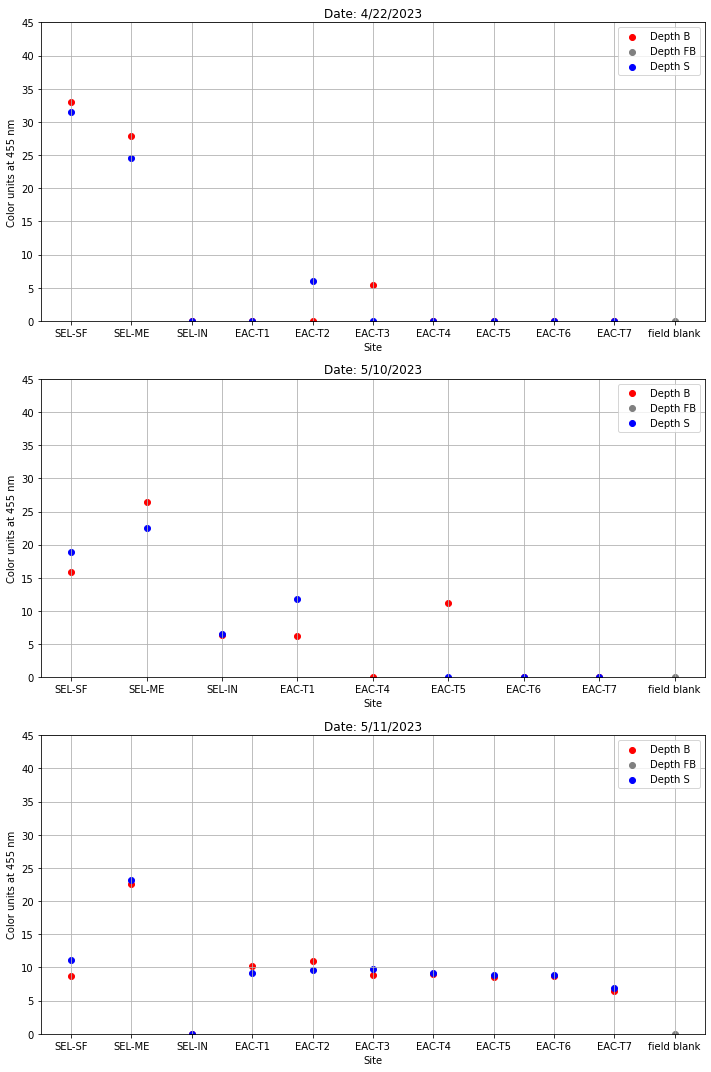

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = pd.to_numeric(df['CU_412'].replace('BDL', 0))
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Map Depth values to colors
depth_colors = {'S': 'blue', 'B': 'red'}

# Group the DataFrame by 'Date' category
grouped = df.groupby('Date')

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(grouped.groups.keys(), axes)):
    # Get data for the current date category
    data = grouped.get_group(date)
    
    # Scatter plot CU_455 by Stn, color by Depth
    for depth, d_data in data.groupby('Depth'):
        color = depth_colors.get(depth, 'gray')
        ax.scatter(d_data['Stn '], d_data['CU_455'], c=color, label=f'Depth {depth}')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Site')
    ax.set_ylabel('Color units at 455 nm')
    ax.legend()
    ax.grid(True)
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


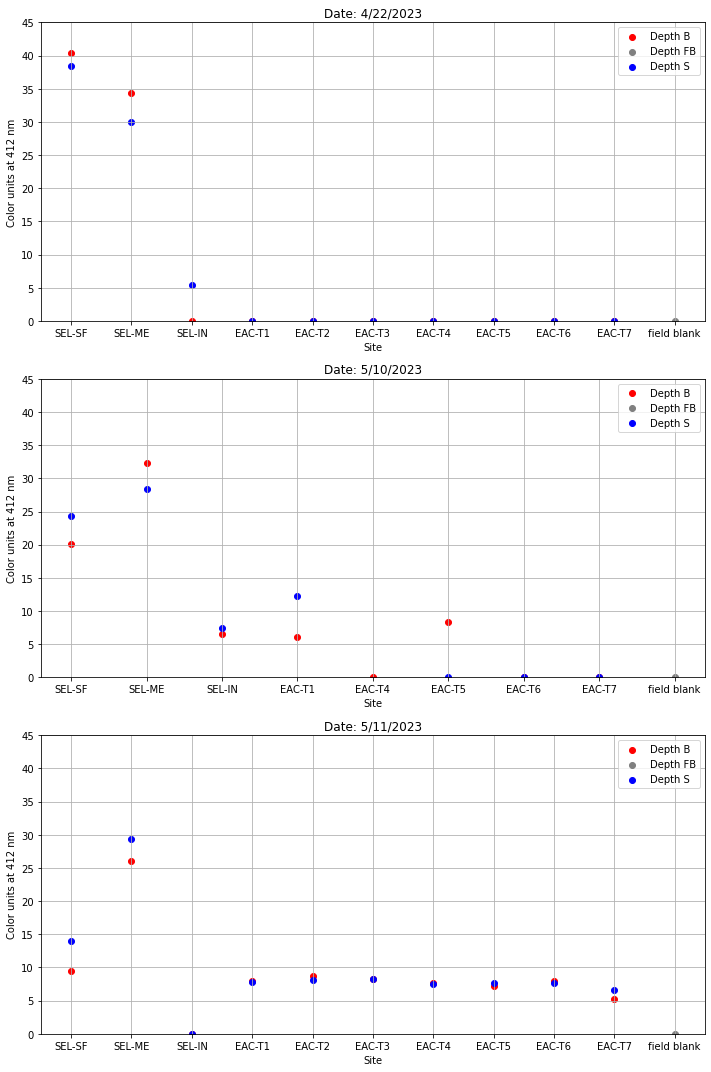

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = pd.to_numeric(df['CU_412'].replace('BDL', 0))
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Map Depth values to colors
depth_colors = {'S': 'blue', 'B': 'red'}

# Group the DataFrame by 'Date' category
grouped = df.groupby('Date')

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(grouped.groups.keys(), axes)):
    # Get data for the current date category
    data = grouped.get_group(date)
    
    # Scatter plot CU_455 by Stn, color by Depth
    for depth, d_data in data.groupby('Depth'):
        color = depth_colors.get(depth, 'gray')
        ax.scatter(d_data['Stn '], d_data['CU_412'], c=color, label=f'Depth {depth}')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Site')
    ax.set_ylabel('Color units at 412 nm')
    ax.legend()
    ax.grid(True)
    
    # Set y-axis range
    ax.set_ylim(0, 45)

# Adjust spacing between subplots
plt.tight_layout()

# Set the figure background color to white
fig.patch.set_facecolor('white')

# Save the plot as an image file
plt.savefig('../../../TURB/Final/455.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Display the plot
plt.show()


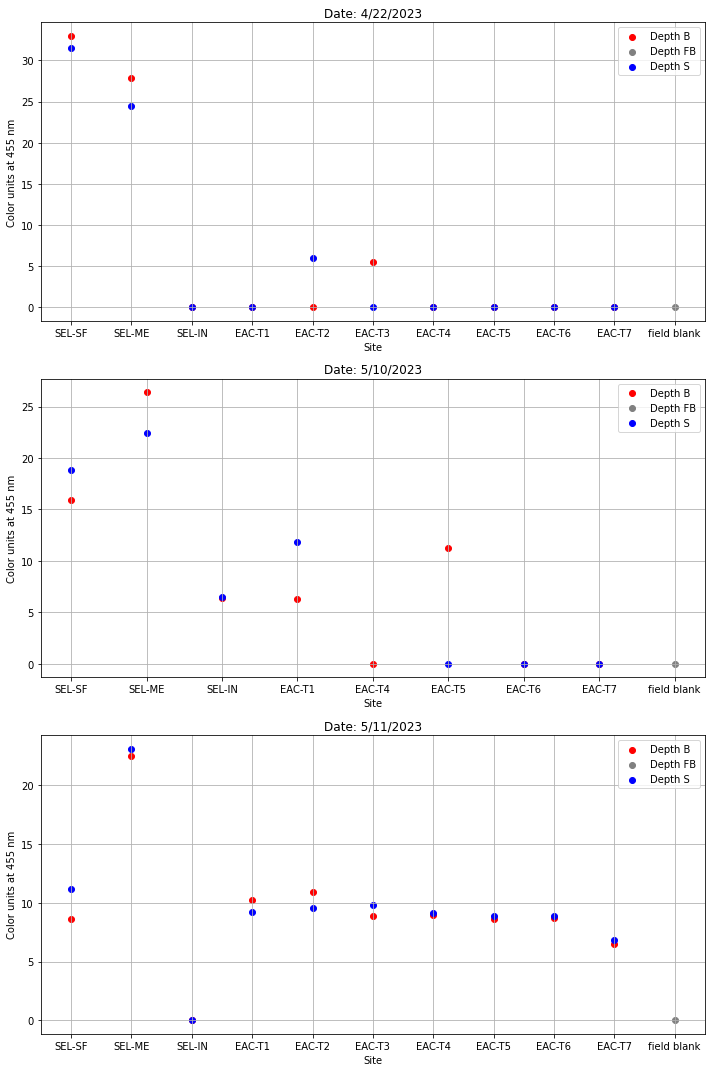

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Map Depth values to colors
depth_colors = {'S': 'blue', 'B': 'red'}

# Group the DataFrame by 'Date' category
grouped = df.groupby('Date')

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(grouped.groups.keys(), axes)):
    # Get data for the current date category
    data = grouped.get_group(date)
    
    # Scatter plot CU_455 by Stn, color by Depth
    for depth, d_data in data.groupby('Depth'):
        color = depth_colors.get(depth, 'gray')
        ax.scatter(d_data['Stn '], d_data['CU_455'], c=color, label=f'Depth {depth}')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Site')
    ax.set_ylabel('Color units at 455 nm')
    ax.legend()
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()


plt.savefig('../../../TURB/Final/455.png')


# Display the plot
plt.show()



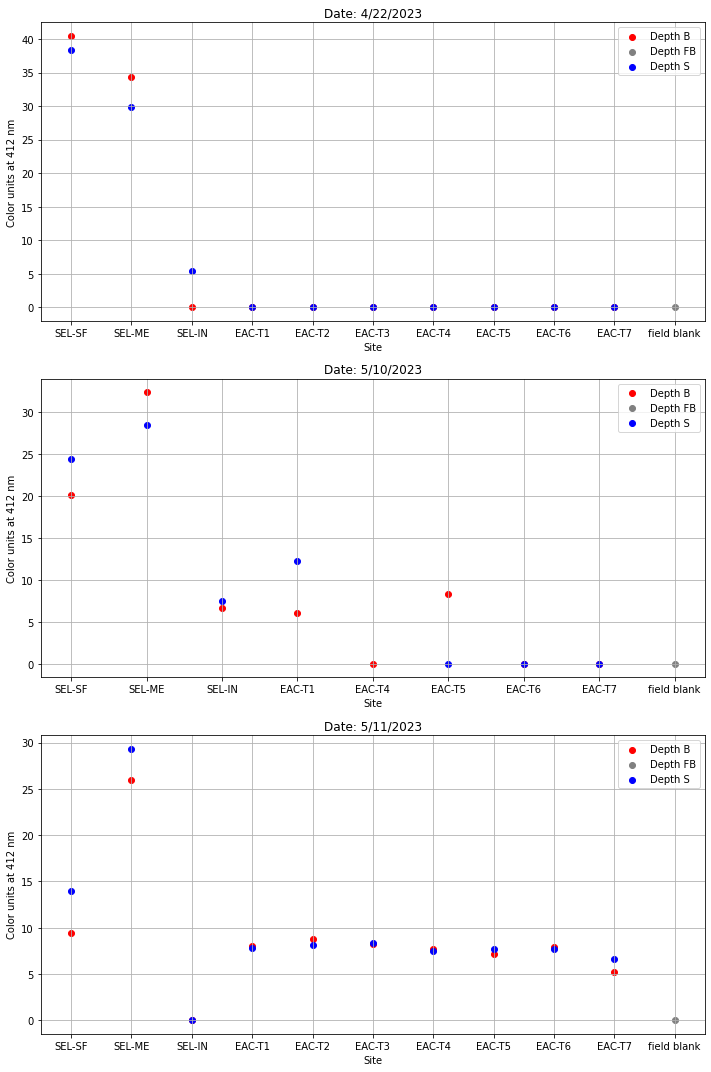

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = pd.to_numeric(df['CU_412'].replace('BDL', 0))
df['CU_455'] = pd.to_numeric(df['CU_455'].replace('BDL', 0))

# Map Depth values to colors
depth_colors = {'S': 'blue', 'B': 'red'}

# Group the DataFrame by 'Date' category
grouped = df.groupby('Date')

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(grouped.groups.keys(), axes)):
    # Get data for the current date category
    data = grouped.get_group(date)
    
    # Scatter plot CU_455 by Stn, color by Depth
    for depth, d_data in data.groupby('Depth'):
        color = depth_colors.get(depth, 'gray')
        ax.scatter(d_data['Stn '], d_data['CU_412'], c=color, label=f'Depth {depth}')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Site')
    ax.set_ylabel('Color units at 412 nm')
    ax.legend()
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()


plt.savefig('../../../TURB/Final/412.png')


# Display the plot
plt.show()



TypeError: 'value' must be an instance of str or bytes, not a int

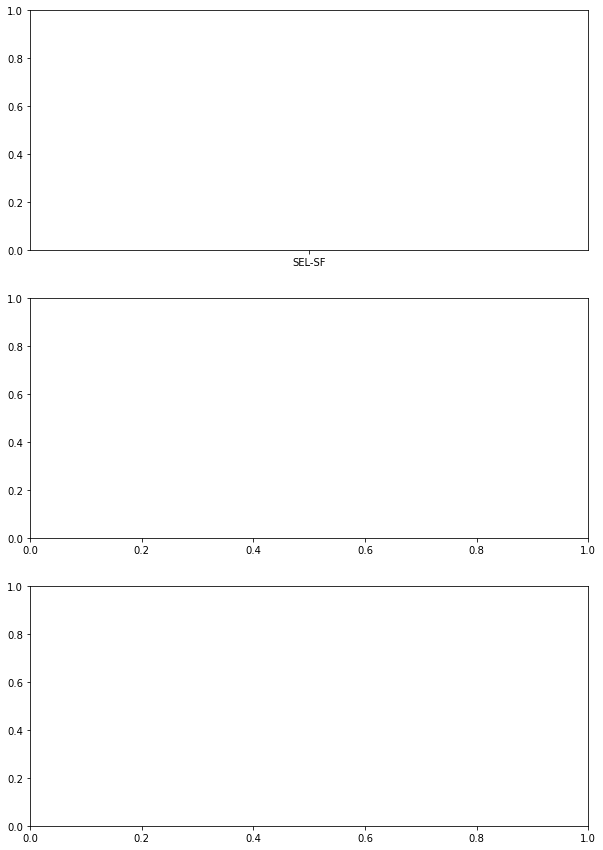

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = df['CU_455'].replace('BDL', 0)

# Map Depth values to colors
depth_colors = {'S': 'blue', 'B': 'red'}

# Group the DataFrame by 'Date' category
grouped = df.groupby('Date')

# Create subplots
fig, axes = plt.subplots(nrows=3, figsize=(10, 15))

# Iterate over date categories and corresponding subplot axes
for i, (date, ax) in enumerate(zip(grouped.groups.keys(), axes)):
    # Get data for the current date category
    data = grouped.get_group(date)
    
    # Scatter plot CU_455 by Stn, color by Depth
    for depth, d_data in data.groupby('Depth'):
        color = depth_colors.get(depth, 'gray')
        ax.scatter(d_data['Stn '], d_data['CU_455'], c=color, label=f'Depth {depth}')
    
    # Set subplot title and labels
    ax.set_title(f"Date: {date}")
    ax.set_xlabel('Stn')
    ax.set_ylabel('CU_455')
    ax.legend()
    ax.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()



KeyError: 'Stn' column not found in the DataFrame for Date: 4/22/2023
KeyError: 'Stn' column not found in the DataFrame for Date: 5/10/2023
KeyError: 'Stn' column not found in the DataFrame for Date: 5/11/2023


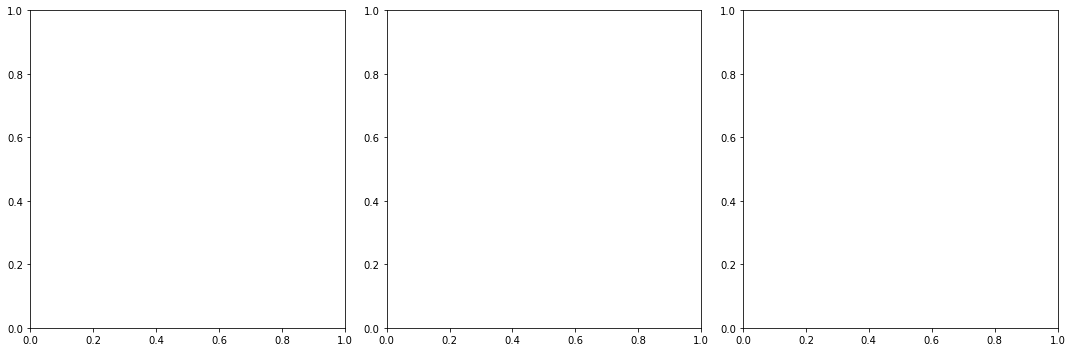

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = df['CU_455'].replace('BDL', 0)

grouped = df.groupby('Date')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, (date, ax) in enumerate(zip(grouped.groups.keys(), axes)):
    data = grouped.get_group(date)

    try:
        for depth, d_data in data.groupby('Date'):
            ax.scatter(d_data['Stn'], d_data['CU_455'], label=depth)
        
        ax.set_title(f"Date: {date}")
        ax.set_xlabel('Station')
        ax.set_ylabel('CU_455')
        ax.legend()
    
    except KeyError as e:
        print(f"KeyError: {e} column not found in the DataFrame for Date: {date}")

plt.tight_layout()
plt.show()


In [23]:
d_data

,CU_455,CU_412,Date,Stn,Depth
Samples,,,,,
231801,11.15679897,13.97865528,5/11/2023,SEL-SF,S
231802,8.639006062,9.427391438,5/11/2023,SEL-SF,B
231803,23.12835827,29.34109339,5/11/2023,SEL-ME,S
231804,22.55336169,26.00881311,5/11/2023,SEL-ME,B
231805,0,0,5/11/2023,SEL-IN,S
231806,0,0,5/11/2023,SEL-IN,B
231807,9.206362077,7.838833951,5/11/2023,EAC-T1,S
231808,10.28428909,8.010106966,5/11/2023,EAC-T1,B
231809,9.553521898,8.093008075,5/11/2023,EAC-T2,S


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded the DataFrame and it's named 'df'

df['CU_412'] = df['CU_412'].replace('BDL', 0)
df['CU_455'] = df['CU_455'].replace('BDL', 0)

# Plotting CU_455 by stn, color by depth category for each date category
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Stn', y='CU_455', hue='depth', palette='viridis')
plt.title(f"Date: {date}")
plt.xlabel('Station')
plt.ylabel('CU_455')
plt.legend(title='Depth')
plt.show()


ValueError: Could not interpret input 'Stn'

<Figure size 576x432 with 0 Axes>